# Procesos estocásticos

El concepto de *aleatoriedad* o *estocasticidad* juega un papel cada vez más importante en la física. Se tratan de procesos que son *aleatorios* o *estocásticos*; un ejemplo es el decaimiento radioactivo, 

Para modelar estos procesos en la computadora, necesitamos poder generar *números aleatorios* en la computadora. Hay un sólo problema: ¡una computadora determinista no tiene fuente de aleatoriedad!

[Sin embargo, se pueden captar datos de procesos aleatorios reales, o de la propia computadara; ver, por ejemplo, <http://www.random.org/>.]



# Números pseudoaleatorios

Podemos producir secuencias de números que *parecen ser* aleatorios (decimos que son *pseudoaleatorios*), usando iteraciones deterministas suficientemente complicadas; sin embargo, estas se tienen que diseñar con mucho cuidado.

Un ejemplo se utilizaba antes, pero que *ya no se ocupa*, ya que no es lo suficientemente bueno, son los llamados generadores congruenciales lineales, de la forma

$$X_{n+1} = \left( a X_n + c \right)~~\bmod~~m.$$

Implementa esta recurrencia con $a = 6364136223846793005$ y $c=	1442695040888963407$. Usamos enteros *unsigned* (sin signo):

    a = UInt64(6364136223846793005)
    
Tomamos $m=2^{64}$, por lo cual **no es necesario llevar a cabo el `mod` de forma explícita**.
    
Los números resultantes caen entre 0 y $2^{64} - 1$, inclusivo.

**[1]** (i) Escribe una función que implementa esta recurrencia para generar un número aleatorio entero en este rango nuevo cada vez que la llamas.

In [44]:
 a = UInt64(6364136223846793005)
 

0x5851f42d4c957f2d

In [46]:
aa = big(ans)

6364136223846793005

In [47]:
c = UInt64(1442695040888963407)

0x14057b7ef767814f

In [48]:
cc = big(ans)

1442695040888963407

In [29]:
function generador_num_aleatorio(a, c, xn, n)
    Xn = [xn]
    for i in 1:n
        xn1 = a*Xn[i] + c
        #@show i, Xn[i], xn1
        push!(Xn, xn1)
    end
    return Xn
end

generador_num_aleatorio (generic function with 1 method)

In [53]:
generador_num_aleatorio(UInt64(6364136223846793005), UInt64(1442695040888963407), UInt64(3), 9)

10-element Array{UInt64,1}:
 0x0000000000000003
 0x1cfb5806dd27fed6
 0x5327b7f7896976ed
 0xbc03b48704e1fbf8
 0x589dcb943678d3e7
 0x9e7cca69653759ea
 0x613b874704ef6571
 0x80eaf8be2f94652c
 0x7bfb06abe54a1e0b
 0x8db82773cabd3e3e

(ii) Utiliza esto para hacer una función `mi_rand` que genere números reales aleatorios en el intervalo real $[0, 1)$, es decir, que incluya $0$ pero excluye $1$.

In [33]:
x_global = 3 # semilla

3

In [42]:
function mi_rand()
    global x_global
    x_nueva = a*x_global + c
    x_global = x_nueva
    return x_nueva
end

mi_rand (generic function with 1 method)

In [6]:
a = UInt64(6364136223846793005)

0x5851f42d4c957f2d

In [2]:
typeof(ans)

UInt64

In [3]:
?UInt64

search: UInt64 UInt16



No documentation found.

**Summary:**

```
immutable UInt64 <: Unsigned
```


In [8]:
let x = 3 
    # Un bloque 'let' introduce variables locales que están disponibles sólo dentro del bloque
    
    global function mi_rand2() # Define la función en ámbito global
        
        x_nueva = a*x + c 
        x = x_nueva
        
        return x
    end
end

mi_rand2 (generic function with 1 method)

In [9]:
mi_rand2()

LoadError: UndefVarError: c not defined

In [55]:
typemax(UInt64) # máximo

0xffffffffffffffff

In [56]:
0x1cfb5806dd27fed6/0xffffffffffffffff

0.11321020286155202

In [16]:
# Ahora convertimos los números aleatorios entre 0 y 1. Normalizamos
function normalizar(num)
    return num/typemax(UInt64)
end

normalizar (generic function with 1 method)

**[2]** Escribe una función para calcular un *histograma*, es decir, dado un vector de datos de entrada, y un número $M$ de cajas, calcula cuántos de los datos caen en cada caja.

In [58]:
?ceil

search: ceil AbstractSerializer slicedim reducedim Exception mapreducedim



```
ceil([T,] x, [digits, [base]])
```

`ceil(x)` returns the nearest integral value of the same type as `x` that is greater than or equal to `x`.

`ceil(T, x)` converts the result to type `T`, throwing an `InexactError` if the value is not representable.

`digits` and `base` work as for [`round`](:func:`round`).

```
ceil(dt::TimeType, p::Period) -> TimeType
```

Returns the nearest `Date` or `DateTime` greater than or equal to `dt` at resolution `p`.

For convenience, `p` may be a type instead of a value: `ceil(dt, Dates.Hour)` is a shortcut for `ceil(dt, Dates.Hour(1))`.

```jldoctest
julia> ceil(Date(1985, 8, 16), Dates.Month)
1985-09-01

julia> ceil(DateTime(2013, 2, 13, 0, 31, 20), Dates.Minute(15))
2013-02-13T00:45:00

julia> ceil(DateTime(2016, 8, 6, 12, 0, 0), Dates.Day)
2016-08-07T00:00:00
```


In [63]:
ceil(2.1)

3.0

In [ ]:
function asignar_caja(M, x)
    segmento = 1/M
    contador = 0
    
     ceil(x*M) 

In [ ]:
function mi_histograma(V::Array, M)
    segmento = 1/M
    for i in 1:length(V)
        
    

**[3]** (i) Utiliza tu función para generar $N$ números aleatorios y haz un histograma.

(ii) Cambia $N$ y vuelve a calcular el histograma. Encuentra el tamaño del "error" de las barras con respecto al valor esperado en función de $N$. 

(iii) Dibuja el error *relativo* como función de $N$. ¿Qué esperas que pase? ¿Cómo cambia el error relativo con $N$? 

En Julia, existe una función `rand()` que utiliza un generador moderno de alta calidad, actualmente el llamado Mersenne Twister, para generar número aleatorios. Hay otros generadores disponibles en el paquete [`RandomNumbers.jl`](https://github.com/sunoru/RandomNumbers.jl).

# Caminatas aleatorias

Uno de los procesos estocásticos más fundamentales e importantes en la física es el *movimiento Browniano*. Un acercamiento inicial a este problema se da a través de las *caminatas aleatorias*, que modela una partícula que recibe impactos al azar, los cuales hacen que brinque en direcciones aleatorias.

**[4]** Piensa en un caminante aleatorio en una dimensión que vive en los enteros. Empieza en la posición $x=0$. En cada paso de tiempo, brinca a la derecha o a la izquierda con igual probabilidad $\frac{1}{2}$.

(i) Utiliza la función `mi_rand` o `rand` para generar el brinco: $+1$ ó $-1$, cada uno con probabilidad $\frac{1}{2}$.

In [12]:
a = UInt64(6364136223846793005)
c = UInt64(1442695040888963407)
x_global = 3

function mi_rand()
    global x_global
    x_nueva = a*x_global + c
    x_global = x_nueva
    return x_nueva
end

mi_rand (generic function with 1 method)

In [17]:
res=mi_rand()

0x5327b7f7896976ed

In [18]:
normalizar(res)

0.32482480805757585

In [34]:
function mi_caminante(s, n, x0=0, p=1/2)
    a = UInt64(6364136223846793005)
    c = UInt64(1442695040888963407)
    s = x_global
    contador = x0
    for i in 1:n
    n_al = mi_rand()
    num_aleat = normalizar(n_al)
        if num_aleat <= 0.50
            contador = contador - 1
        else 
            contador = contador + 1 
        end
        @show i, num_aleat, contador
    end
    return contador
end

mi_caminante (generic function with 3 methods)

In [38]:
mi_caminante(3, 5, 0, 1/2)

(i,num_aleat,contador) = (1,0.2306201333403989,-1)
(i,num_aleat,contador) = (2,0.44059207987608423,-2)
(i,num_aleat,contador) = (3,0.9089024046463265,-1)
(i,num_aleat,contador) = (4,0.4861449388681203,-2)
(i,num_aleat,contador) = (5,0.19216294467242706,-3)


-3

(ii) Haz una función que calcule la trayectoria de una caminata aleatoria que empiece en $0$ y toma $N$ pasos al azar. 

In [87]:
function trayectoria_caminata_aleat(s, n, x0, p)
    a = UInt64(6364136223846793005)
    c = UInt64(1442695040888963407)
    s = x_global
    contador = x0
    trayectoria = [0]
    for i in 1:n
    n_al = mi_rand()
    num_aleat = normalizar(n_al)
        if num_aleat <= p
            contador = contador - 1
        else 
            contador = contador + 1 
        end
        #@show i, num_aleat, contador
        push!(trayectoria, contador)
    end
    return trayectoria
end

trayectoria_caminata_aleat (generic function with 4 methods)

In [88]:
trayectoria_caminata_aleat(3, 5, 0, 1/2)

6-element Array{Int64,1}:
 0
 1
 0
 1
 0
 1

(iii) Dibuja unas cuantas trayectorias en una misma gráfica, con la posición $x(t)$ como función del tiempo $t$. ¿Qué observas?

In [53]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [89]:
t1 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t2 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t3 = trayectoria_caminata_aleat(3, 50, 0, 1/2);


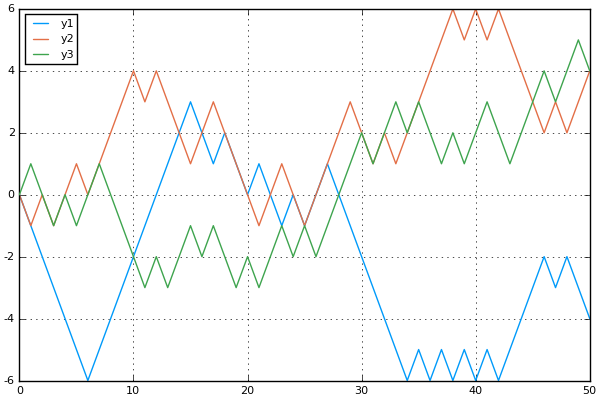

In [90]:
plot([0:1:length(t1)-1], t1)
plot!([0:1:length(t2)-1], t2)
plot!([0:1:length(t3)-1], t3)

(iv) Ahora dibuja muchas trayectorias en una misma gráfica. ¿Qué observas?

In [91]:
t1 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t2 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t3 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t4 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t5 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t6 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t7 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t8 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t9 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t10 = trayectoria_caminata_aleat(3, 50, 0, 1/2);


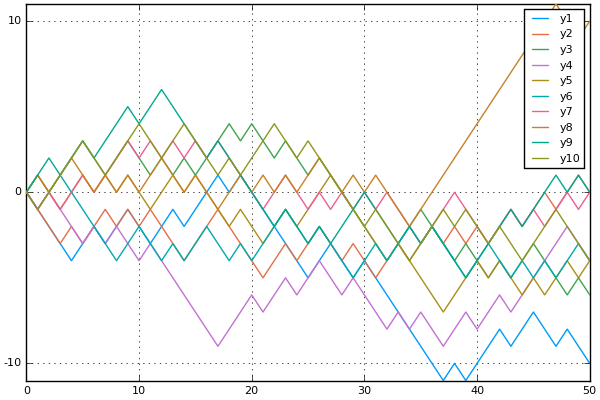

In [92]:
plot([0:1:length(t1)-1], t1)
plot!([0:1:length(t2)-1], t2)
plot!([0:1:length(t3)-1], t3)
plot!([0:1:length(t4)-1], t4)
plot!([0:1:length(t5)-1], t5)
plot!([0:1:length(t6)-1], t6)
plot!([0:1:length(t7)-1], t7)
plot!([0:1:length(t8)-1], t8)
plot!([0:1:length(t9)-1], t9)
plot!([0:1:length(t10)-1], t10)

In [96]:
# Trayectorias
function list_tray(N)
    Trayectorias = []
    for i in 1:N
        tray = trayectoria_caminata_aleat(3, 50, 0, 1/2)
        push!(Trayectorias, tray)
    end
    return Trayectorias
end


list_tray (generic function with 1 method)

In [98]:
Trayect = list_tray(100)

100-element Array{Any,1}:
 [0,1,0,1,0,-1,0,-1,0,1  …  -3,-2,-3,-2,-3,-2,-1,-2,-1,-2]                
 [0,-1,0,-1,-2,-3,-2,-3,-4,-5  …  -17,-18,-19,-20,-19,-20,-21,-22,-21,-20]
 [0,1,0,1,0,-1,-2,-3,-4,-5  …  -1,-2,-1,0,1,2,1,2,3,4]                    
 [0,1,2,3,4,3,2,1,0,-1  …  -1,0,-1,0,1,2,3,2,1,2]                         
 [0,1,2,3,2,1,0,-1,-2,-3  …  -7,-8,-7,-8,-7,-6,-5,-6,-7,-6]               
 [0,1,2,3,2,1,0,-1,-2,-3  …  -1,0,1,2,3,2,3,4,5,6]                        
 [0,1,0,-1,0,-1,0,-1,0,-1  …  -7,-6,-7,-8,-7,-8,-7,-8,-9,-8]              
 [0,1,0,-1,-2,-1,0,1,0,1  …  1,0,1,2,3,4,3,2,3,2]                         
 [0,1,0,1,2,1,2,1,0,1  …  3,4,5,6,7,8,7,6,7,8]                            
 [0,1,2,1,0,1,0,-1,0,-1  …  -3,-2,-3,-2,-1,-2,-1,0,1,0]                   
 [0,1,0,1,2,3,2,1,0,1  …  3,2,1,0,-1,-2,-1,-2,-1,0]                       
 [0,1,0,1,2,1,2,3,4,3  …  -1,0,1,2,3,2,1,2,1,0]                           
 [0,1,2,1,0,-1,-2,-3,-2,-1  …  -1,-2,-1,0,-1,-2,-1,-2,-1,-2]              

In [ ]:
function graph_tray(N)
    p  = plot(t, tray)
    
    for i in 1:N
        plot!(t)

**[5]** Modifica tu función para que brinque a la derecha con probabilidad $p$ y a la izquierda con probabilidad $q := 1-p$. Dibuja las trayectorias para varios valores de $p$. ¿Qué observas?

In [93]:
function trayectoria_caminata_aleat2(s, N, x0, p)
    a = UInt64(6364136223846793005)
    c = UInt64(1442695040888963407)
    s = x_global
    q = 1 - p
    contador = x0
    trayectoria = [0]
    for i in 1:n
    n_al = mi_rand()
    num_aleat = normalizar(n_al)
        if num_aleat <= q
            contador = contador - 1
        else 
            contador = contador + 1 
        end
        #@show i, num_aleat, contador
        push!(trayectoria, contador)
    end
    return trayectoria
end

trayectoria_caminata_aleat2 (generic function with 1 method)

In [ ]:
t1 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t2 = trayectoria_caminata_aleat(3, 50, 0, 1/2);
t3 = trayectoria_caminata_aleat(3, 50, 0, 1/2);

**[6]** ¿Cómo puedes caracterizar la posición de los caminantes después de $N$ pasos? Hazlo. ¿Cómo evoluciona en el tiempo? Si es demasiado trivial, piensa en otra caracterización.

# Caminatas aleatorias en 2D

**[7]** Una partícula grande inmersa en un fluido lleva a cabo una caminata aleatoria / movimiento Browniano. 

(i) Simula una partícula que vive en una red cuadrada con coordenadas enteras y puede brincar en cualquiera de las 4 direcciones más cercanas con igual probabilidad. 

(ii) Dibuja unas trayectorias. ¿Qué observas?

(iii) Dibuja muchas trayectorias. ¿Qué observas?

(iv) ¿Cómo puedes caracterizar la distribución al tiempo $t$?

**[8]** Para acercarnos al movimiento Browniano, podemos hacer que los brincos sean de distintos tamaños. Piensa en varias formas de hacerlo, implementarlas, y dibuja las trayectorias correspondientes. ¿Cómo se pueden caracterizar los comportamientos resultantes?

## Dibujar Campos Vectoriales

In [1]:
?quiver

search:

Couldn't find quiver
Perhaps you meant quit, quote, Timer, super, Number or quadgk


No documentation found.

Binding `quiver` does not exist.
